In [1]:
import csv

def read_and_make_csv(input_file, output_file):

    # Open the input file for reading
    with open(input_file, 'r') as file:
        lines = file.readlines()

    data = []
    headers = ['Number of Elements', 'Element Size', 'Main Query Size', 'Main Reply Size', 'Size Gal Keys']

    # Process the lines and extract the data
    for line in lines:
        if line.startswith('number of elements:'):
            num_elements = line.split(': ')[1].strip()
        elif line.startswith('element size:'):
            element_size = line.split(': ')[1].strip()
        elif line.startswith('Main: Query size:'):
            query_size = line.split(': ')[2].split(' ')[0]
        elif line.startswith('Main: Reply size:'):
            reply_size = line.split(': ')[2].split(' ')[0]
        elif line.startswith('size_gal_keys:'):
            gal_keys_size = line.split(': ')[1].split(' ')[0]
            data.append([num_elements, element_size, query_size, reply_size, gal_keys_size])

    # Write the extracted data to a CSV file
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(headers)
        writer.writerows(data)

    print(f"CSV file '{output_file}' has been created with the extracted data.")


In [2]:
for x in ["", "2", "3"]:
    input_file = f'results{x}.txt'
    output_file = f'output{x}.csv'
    read_and_make_csv(input_file, output_file)

CSV file 'output.csv' has been created with the extracted data.
CSV file 'output2.csv' has been created with the extracted data.
CSV file 'output3.csv' has been created with the extracted data.


In [3]:
import pandas as pd
data=pd.read_csv('output.csv')
for col in ['Main Query Size','Main Reply Size','Size Gal Keys']:
    data[col] = data[col] / 1000
data

,Number of Elements,Element Size,Main Query Size,Main Reply Size,Size Gal Keys
0,4,10240,92.866,185.405,415.481
1,8,10240,92.920,185.548,415.558
2,16,10240,92.860,185.615,553.700
3,32,10240,92.860,185.415,553.424
4,64,10240,92.991,185.340,691.999
5,128,10240,92.844,185.527,691.725
6,256,10240,92.910,185.431,829.831
7,512,10240,92.921,185.383,830.006
8,1024,10240,92.931,185.400,967.917
9,2048,10240,92.854,185.455,968.070


[]

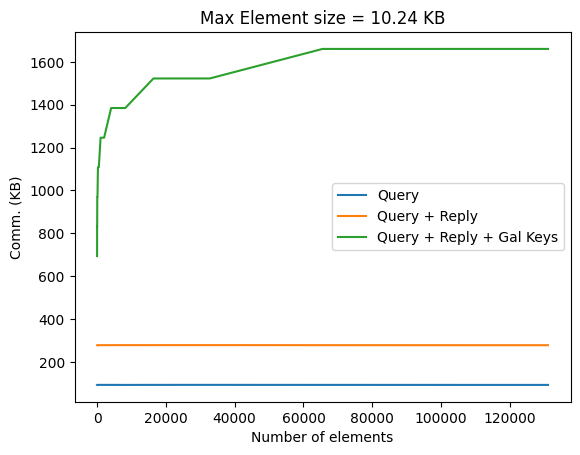

In [5]:
import matplotlib.pyplot as plt
plt.plot(data['Number of Elements'], data['Main Query Size'], label='Query')
plt.plot(data['Number of Elements'], data['Main Reply Size']+data['Main Query Size'], label='Query + Reply')
plt.plot(data['Number of Elements'], data['Size Gal Keys']+data['Main Reply Size']+data['Main Query Size'], label='Query + Reply + Gal Keys')
plt.ylabel("Comm. (KB)")
plt.xlabel("Number of elements")
plt.title("Max Element size = 10.24 KB")
plt.legend()
plt.plot()

[]

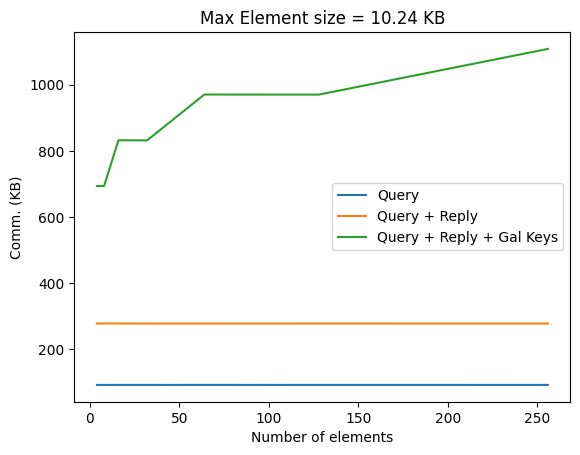

In [7]:
import matplotlib.pyplot as plt

data = data[data['Number of Elements'] <= 256]

plt.plot(data['Number of Elements'], data['Main Query Size'], label='Query')
plt.plot(data['Number of Elements'], data['Main Reply Size']+data['Main Query Size'], label='Query + Reply')
plt.plot(data['Number of Elements'], data['Size Gal Keys']+data['Main Reply Size']+data['Main Query Size'], label='Query + Reply + Gal Keys')
plt.ylabel("Comm. (KB)")
plt.xlabel("Number of elements")
plt.title("Max Element size = 10.24 KB")
plt.legend()
plt.savefig('comm.png')
plt.plot()

In [43]:
import pandas as pd
data=pd.read_csv('output2.csv')
for col in ['Main Query Size','Main Reply Size','Size Gal Keys']:
    data[col] = data[col] / 1000
data

,Number of Elements,Element Size,Main Query Size,Main Reply Size,Size Gal Keys
0,4,200,92.823,185.434,277.177
1,8,200,92.901,185.410,277.256
2,16,200,92.873,185.309,277.210
3,32,200,92.803,185.386,277.258
4,64,200,93.107,185.508,277.263
5,128,200,92.826,185.468,277.187
6,256,200,92.905,185.423,415.479
7,512,200,92.877,185.662,415.539
8,1024,200,92.824,185.393,553.628
9,2048,200,92.911,185.496,553.781


[]

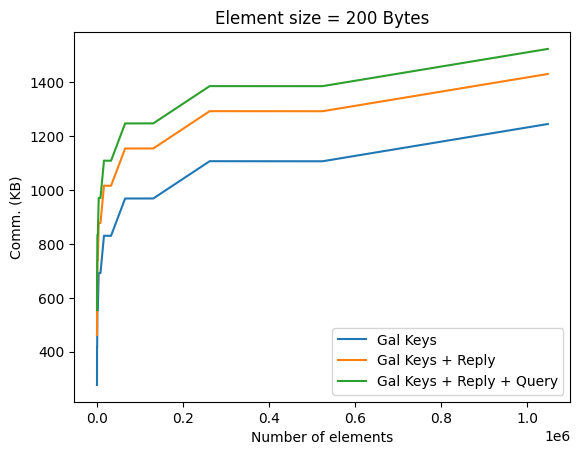

In [44]:
import matplotlib.pyplot as plt
plt.plot(data['Number of Elements'], data['Size Gal Keys'], label='Gal Keys')
plt.plot(data['Number of Elements'], data['Size Gal Keys']+data['Main Reply Size'], label='Gal Keys + Reply')
plt.plot(data['Number of Elements'], data['Size Gal Keys']+data['Main Reply Size']+data['Main Query Size'], label='Gal Keys + Reply + Query')
plt.ylabel("Comm. (KB)")
plt.xlabel("Number of elements")
plt.title("Element size = 200 Bytes")
plt.legend()
plt.plot()

In [45]:
import pandas as pd
data=pd.read_csv('output3.csv')
for col in ['Main Query Size','Main Reply Size','Size Gal Keys']:
    data[col] = data[col] / 1000
data

,Number of Elements,Element Size,Main Query Size,Main Reply Size,Size Gal Keys
0,256,4,92.879,185.423,277.366
1,256,8,92.980,185.285,277.271
2,256,16,92.888,185.541,277.285
3,256,32,93.043,185.385,277.325
4,256,64,92.902,185.369,277.334
5,256,128,92.952,185.472,415.168
6,256,256,92.868,185.518,415.520
7,256,512,92.870,185.540,415.537
8,256,1024,92.947,185.615,553.301
9,256,2048,92.842,185.497,691.772


[]

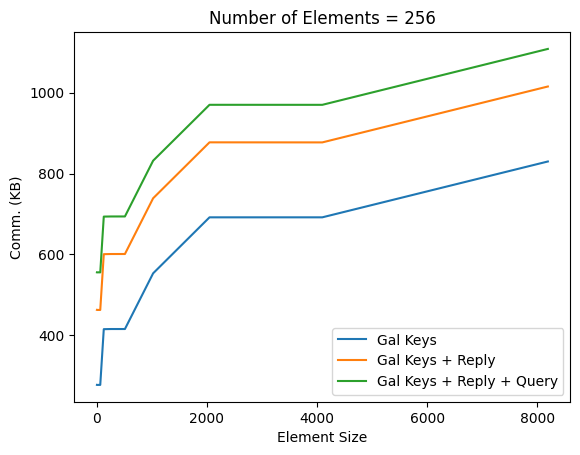

In [47]:
import matplotlib.pyplot as plt
plt.plot(data['Element Size'], data['Size Gal Keys'], label='Gal Keys')
plt.plot(data['Element Size'], data['Size Gal Keys']+data['Main Reply Size'], label='Gal Keys + Reply')
plt.plot(data['Element Size'], data['Size Gal Keys']+data['Main Reply Size']+data['Main Query Size'], label='Gal Keys + Reply + Query')
plt.ylabel("Comm. (KB)")
plt.xlabel("Element Size")
plt.title("Number of Elements = 256")
plt.legend()
plt.plot()